In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import re


In [2]:
#Read data
data = pd.read_csv("D:/python_projects/ML_Projects/02_Logistic Regression/Fake_Bills/fake_bills.csv")
data.head()

,is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
0,True;171.81;104.86;104.95;4.52;2.89;112.83
1,True;171.46;103.36;103.66;3.77;2.99;113.09
2,True;172.69;104.48;103.5;4.4;2.94;113.16
3,True;171.36;103.91;103.94;3.62;3.01;113.51
4,True;171.73;104.28;103.46;4.04;3.48;112.54


# Extract all valuse and create new data frame using EDA

In [3]:
col = list(data.columns)
col

['is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length']

In [4]:
col_name = col[0].split(";")
col_name

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [5]:
data.rename(columns={data.columns[0]:"val"}, inplace=True)

In [6]:
data.head()

,val
0,True;171.81;104.86;104.95;4.52;2.89;112.83
1,True;171.46;103.36;103.66;3.77;2.99;113.09
2,True;172.69;104.48;103.5;4.4;2.94;113.16
3,True;171.36;103.91;103.94;3.62;3.01;113.51
4,True;171.73;104.28;103.46;4.04;3.48;112.54


In [7]:
for i in range(len(data.val)):
    data.val[i] = data.val[i].split(";")

In [8]:
data.head()

,val
0,"[True, 171.81, 104.86, 104.95, 4.52, 2.89, 112..."
1,"[True, 171.46, 103.36, 103.66, 3.77, 2.99, 113..."
2,"[True, 172.69, 104.48, 103.5, 4.4, 2.94, 113.16]"
3,"[True, 171.36, 103.91, 103.94, 3.62, 3.01, 113..."
4,"[True, 171.73, 104.28, 103.46, 4.04, 3.48, 112..."


In [ ]:
for i in range(len(col_name)):
    col_name[i] = []
    for j in range(len(data.val)):
        col_name[i].append(data.val[j][i])
    print(col_name[i])

In [10]:
df = pd.DataFrame(col_name)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,171.81,171.46,172.69,171.36,171.73,172.17,172.34,171.88,172.47,172.47,...,171.82,171.79,172.01,171.63,171.57,171.75,172.19,171.8,172.06,171.47
2,104.86,103.36,104.48,103.91,104.28,103.74,104.18,103.76,103.92,104.07,...,104.32,104.18,103.97,104.33,104.14,104.38,104.63,104.01,104.28,104.15
3,104.95,103.66,103.5,103.94,103.46,104.08,103.85,104.08,103.67,104.02,...,104.05,104.54,104.4,104.61,104.14,104.17,104.44,104.12,104.06,103.82
4,4.52,3.77,4.4,3.62,4.04,4.42,4.58,3.98,4.0,4.04,...,6.06,5.13,5.52,4.88,5.41,4.42,5.27,5.51,5.17,4.63


In [12]:
df = np.transpose(df)

In [13]:
df.head()

,0,1,2,3,4,5,6
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.5,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [14]:
newcol = col[0].split(";")
newcol

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [15]:
df.columns = newcol

In [16]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.5,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [17]:
df.dtypes

is_genuine      object
diagonal        object
height_left     object
height_right    object
margin_low      object
margin_up       object
length          object
dtype: object

In [18]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [19]:
# convert target data into remeric data 
for i in range(len(df.is_genuine)):
    if df.is_genuine[i] == "True":
        df.is_genuine[i] = 1
    elif df.is_genuine[i] == "False":
        df.is_genuine[i] = 0
        

In [20]:
new_col = list(df.columns)
for i in range(len(new_col)):
    df[new_col[i]] = pd.to_numeric(df[new_col[i]], errors ='coerce')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
df.dropna()

In [23]:
# Remove row with finite value 
df = df[np.isfinite(df).all(1)]

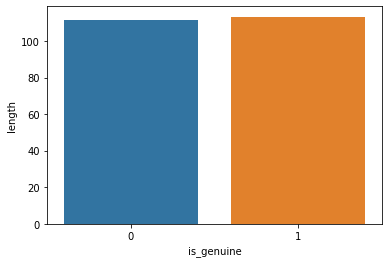

In [24]:
sns.barplot(df, x= 'is_genuine', y = 'length')

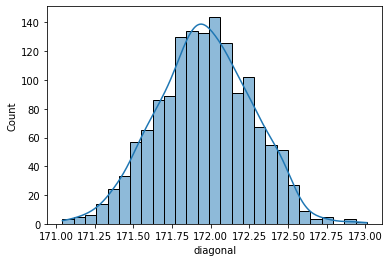

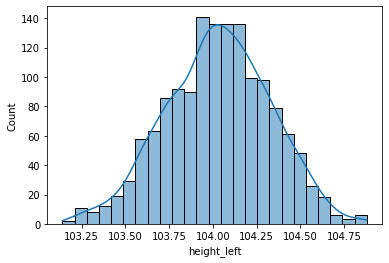

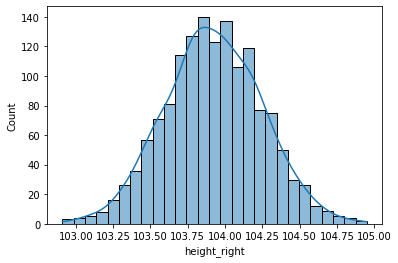

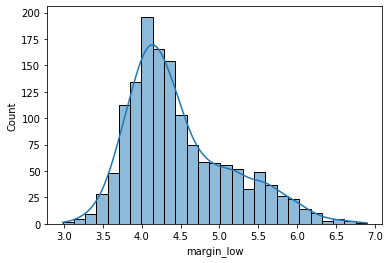

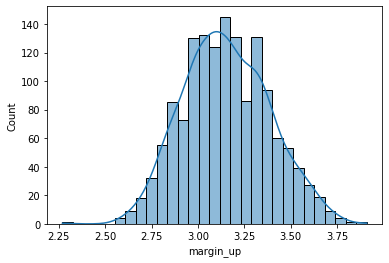

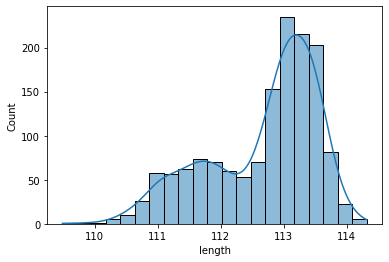

In [31]:
hist_var = df.columns
for i in range(len(hist_var)):
    try:
        sns.histplot(df[hist_var[i+1]], kde = True)
        plt.show()
    except IndexError:
        pass

In [32]:
## Correlation between all variables 
df.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


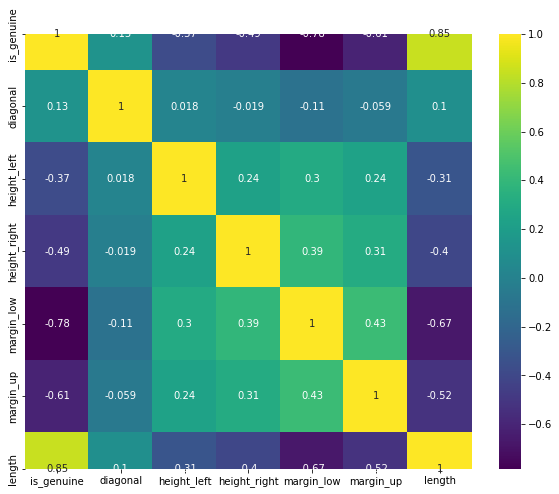

In [33]:
fig= plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, cmap = 'viridis')

In [34]:
# split data into X and y 
X= df.iloc[:,1:]
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [35]:
type(X.diagonal[0])

numpy.float64

In [36]:
y = df.is_genuine

In [37]:
type(y[0])

numpy.int64

# Create Logistic Regression model

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state= 35)

In [39]:
# Impliment model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [40]:
## Creating parameters for Grid Search CV, 
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l2','l1','elasticnet'], 'C': [0.1,0.2,0.3,0.4,0.001,0.005,0.5,0.6,0.7,0.8,0.9], 'max_iter':[100,200,300]}

In [41]:
##perform Grid search CV
classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv = 5)

In [ ]:
## fit the train data in grid search cv 
classifier_regressor.fit(X_train,y_train)

In [ ]:
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.001, 0.005, 0.5, 0.6, 0.7,
                               0.8, 0.9],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [43]:
## find best parameters
classifier_regressor.best_params_

{'C': 0.2, 'max_iter': 200, 'penalty': 'l2'}

In [44]:
classifier_regressor.best_score_

0.9892539454806313

In [45]:
## make prediction
y_pred = classifier_regressor.predict(X_test)

In [46]:
y_proba = classifier_regressor.predict_proba(X_test)

In [47]:
## find accuracy
from sklearn.metrics import classification_report, accuracy_score

In [48]:
score = accuracy_score(y_pred,y_test)
score

0.9886104783599089

In [49]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       129
           1       1.00      0.99      0.99       310

    accuracy                           0.99       439
   macro avg       0.98      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439



In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[128,   4],
       [  1, 306]], dtype=int64)

# Naive bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [52]:
nb.fit(X_train,y_train)


GaussianNB()

In [53]:
nb.score(X_test, y_test)

0.9886104783599089

# ROC AUC

In [54]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9832


In [55]:
score = roc_auc_score(y_test, y_proba[:,1])
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9936


# Plotting the ROC Curve with Scikit-Learn

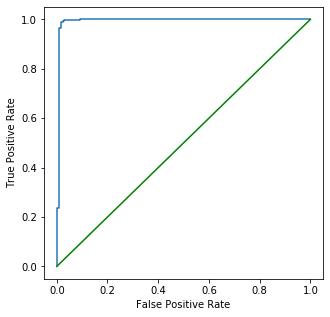

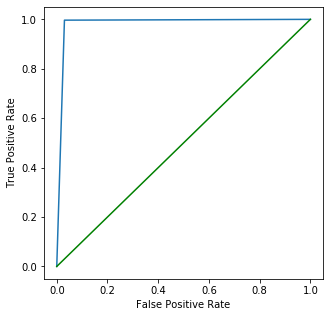

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)

# KMeans clustrings

In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [58]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

Xk, yk = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility
print(type(Xk[0][0]))
range_n_clusters = [2, 3, 4, 5, 6]

<class 'numpy.float64'>


In [60]:
# K Means Clustering Using the Elbow Method
# For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). 
# WCSS is the sum of the squared distance between each point and the centroid in a cluster.
#When we plot the WCSS with the K value, the plot looks like an Elbow.

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'WCSS')

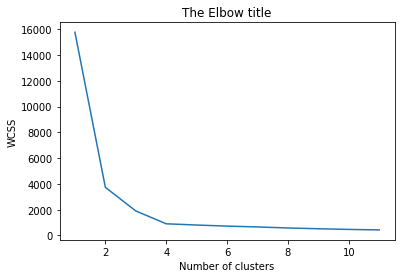

In [61]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(Xk)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,12)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [62]:
cluster = KMeans(n_clusters=4,
    random_state=10)
cluster_lables = cluster.fit_predict(Xk)
print(cluster_lables)

[2 2 3 1 0 1 0 0 0 0 2 2 0 1 0 2 0 2 1 0 3 3 0 1 0 0 1 1 3 0 2 1 0 2 0 2 3
 3 2 3 0 3 1 0 0 2 3 0 1 1 1 3 3 0 2 3 3 3 3 0 1 1 3 0 1 0 2 0 3 3 2 3 0 2
 0 0 2 0 0 3 1 1 3 1 1 3 3 1 3 3 1 2 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 1 1 3 0
 2 1 3 1 3 1 0 1 0 3 2 2 3 0 3 1 2 2 0 1 3 3 3 3 2 1 0 1 1 0 2 0 1 1 1 0 0
 2 2 3 3 1 2 1 3 3 3 3 3 3 3 3 3 1 2 2 2 0 1 2 3 0 2 1 3 3 3 3 2 0 3 1 2 2
 3 0 2 2 0 1 1 2 2 0 1 0 2 2 1 2 3 1 0 0 2 0 3 2 0 3 0 3 2 0 0 0 1 3 1 0 2
 3 0 3 3 3 1 3 1 2 3 2 3 1 1 3 2 1 2 0 3 2 2 2 2 0 3 2 3 0 1 1 0 0 1 3 0 3
 1 0 1 3 3 1 0 2 2 3 3 3 0 1 1 0 1 3 2 1 2 1 2 2 1 2 1 1 0 3 3 3 0 0 3 2 1
 2 2 2 0 3 0 2 3 2 2 3 2 2 3 1 2 0 0 1 1 3 2 1 1 0 2 1 1 0 3 1 3 0 2 2 1 3
 2 0 1 1 0 0 0 2 0 1 1 3 1 1 1 1 2 2 0 1 3 0 2 1 3 1 0 1 3 0 3 1 0 0 2 1 2
 2 2 2 2 2 3 2 1 2 1 1 3 1 0 3 3 2 1 3 1 0 2 3 3 2 3 3 1 1 2 3 0 1 0 0 2 2
 0 2 3 3 2 3 2 3 1 2 1 3 0 1 3 0 1 2 0 1 1 3 0 3 0 2 1 2 0 1 2 2 2 3 1 0 2
 0 0 3 3 2 0 0 0 0 0 0 2 0 3 2 0 1 0 1 0 3 3 1 1 1 3 0 3 2 3 1 0 2 1 2 1 2
 0 1 1 2 3 0 2 3 3 3 2 0 

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


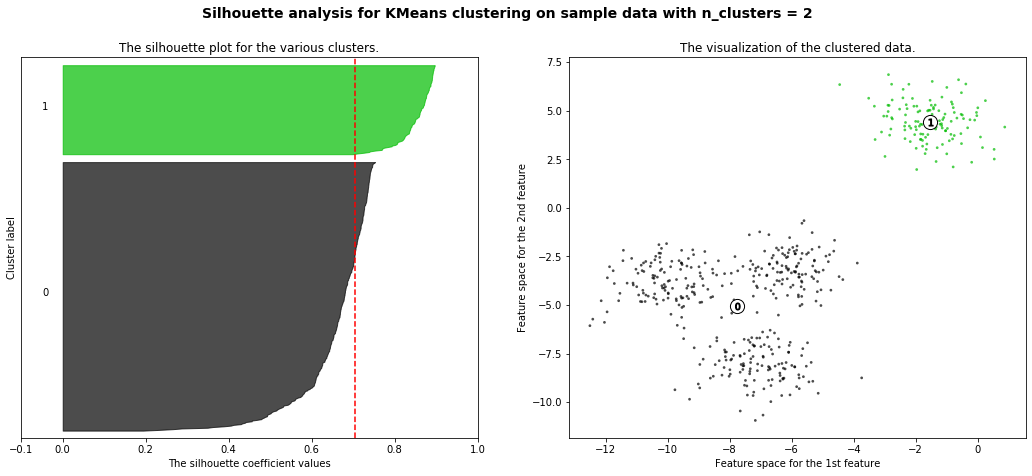

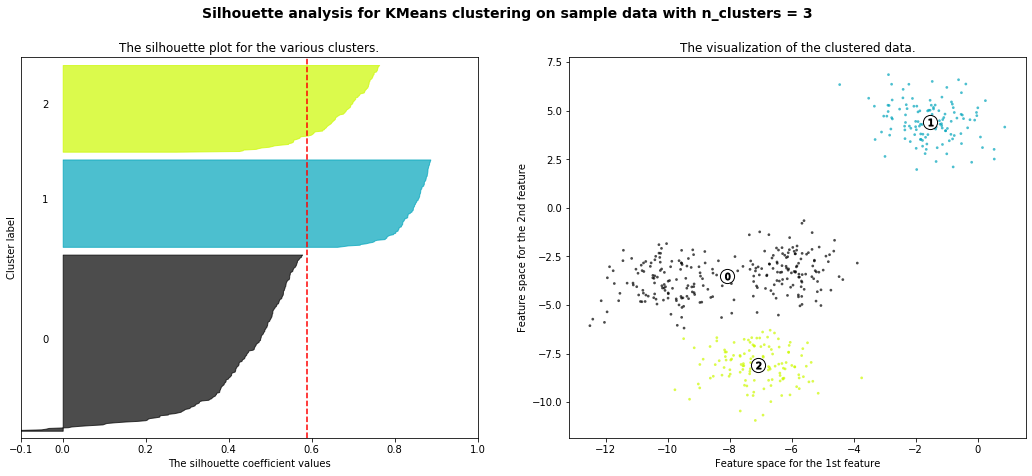

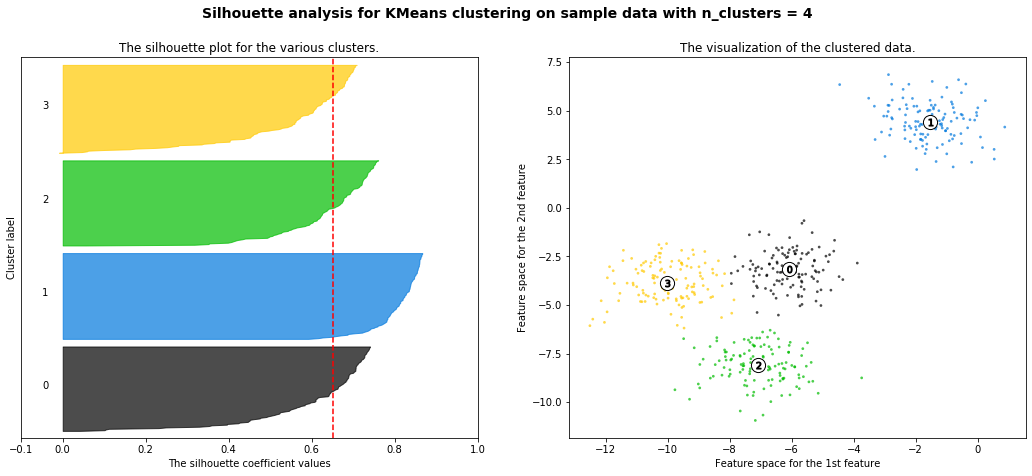

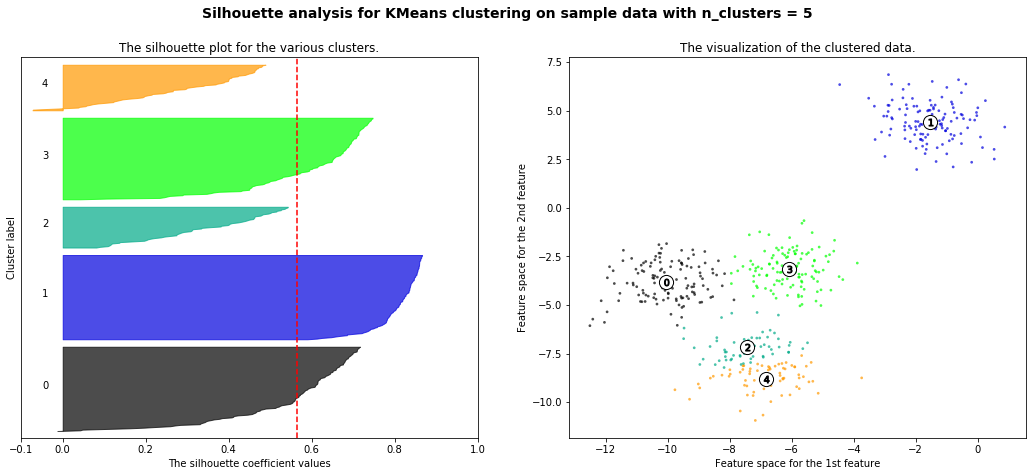

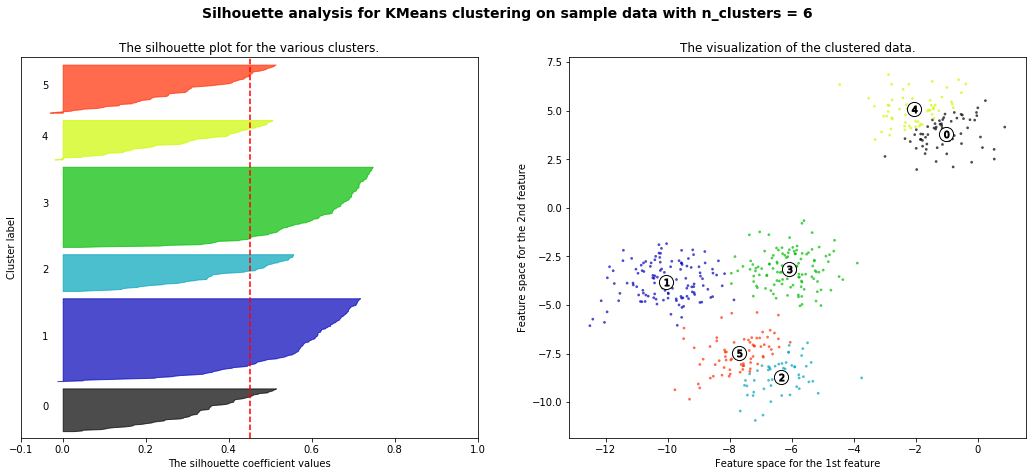

In [63]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xk) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(Xk)
   
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xk, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xk, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        Xk[:, 0], Xk[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()